In [1]:
import matplotlib.pyplot as plt

In [2]:
import econ101 as econ

# PPF

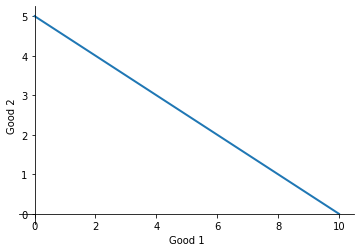

In [3]:
ppf = econ.PPF(1,p2 = 2,endowment = 10)

ppf.plot()
plt.show()

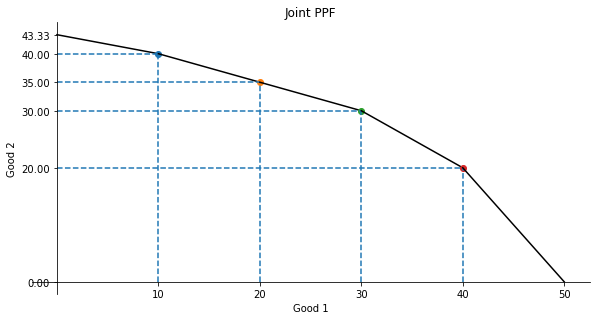

In [4]:
ppf_list = [econ.PPF(1,x, endowment = 10) for x in [2,.5,1,2,3]]

joint = econ.JointPPF(ppf_list)

fig, ax = plt.subplots(figsize = (10,5))
joint.plot(ax)

In [5]:
joint.efficiency(10,40)

'efficient'

In [6]:
joint.efficiency(10,41)

'unattainable'

In [7]:
joint.efficiency(45,0)

'inefficient'

# Demand and Supply Curves

In [8]:
d = econ.Demand(12,-2)
s = econ.Supply(0,1)

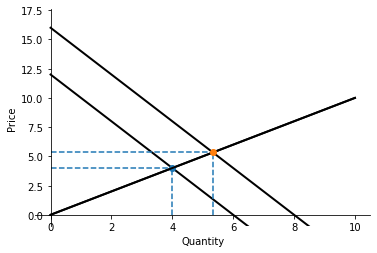

In [9]:
d.equilibrium_plot(s)
d.horizontal_shift(2)
d.equilibrium_plot(s)

# Aggregated Supply and Demand Curves

In [10]:
d1 = econ.Demand(12,-2)
d2 = econ.Demand(20,-4)
d3 = econ.Demand(5,-0.5)
agg_demand = econ.Aggregate([d1,d2,d3])

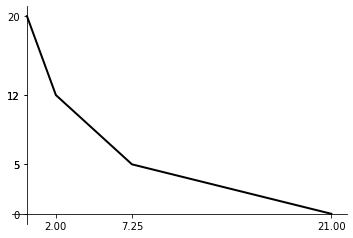

In [11]:
agg_demand.plot()

# Equilibrium

## Linear Demand and Supply

In [12]:
e = econ.Equilibrium(d, s)

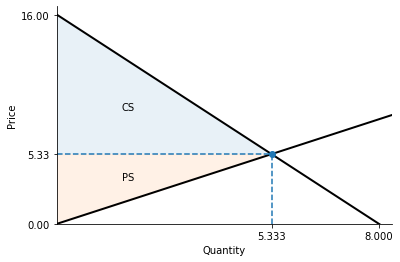

In [13]:
e.plot()
e.plot_surplus()

In [14]:
d.consumer_surplus(e.p)

28.444444444444443

In [15]:
s.producer_surplus(e.p)

14.222222222222225

## Aggregate Demand and Supply

In [16]:
agg_e = agg_demand.equilibrium(s)

print(agg_e) # p, q

(6.299999999999986, 6.275000000000011)


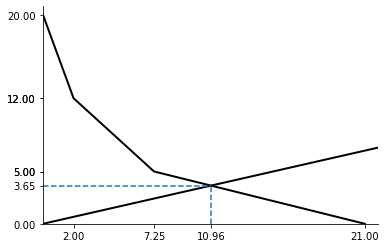

In [17]:
# Equilibrium plot with two aggregates

s2 = econ.Aggregate([s,s,s])
agg_demand.equilibrium_plot(s2)

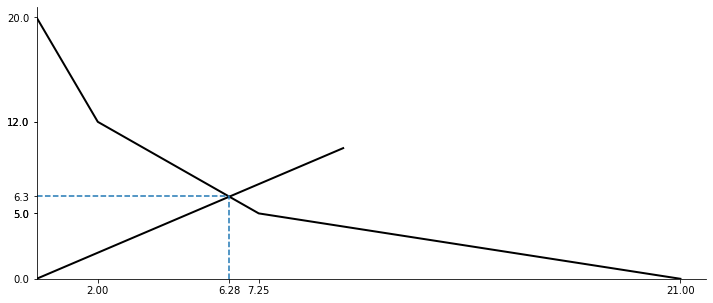

In [18]:
# Equilibrium plot with non-agg supply

agg_demand.equilibrium_plot(s)
plt.gcf().set_size_inches(12,5)

# Taxes and Subsidies

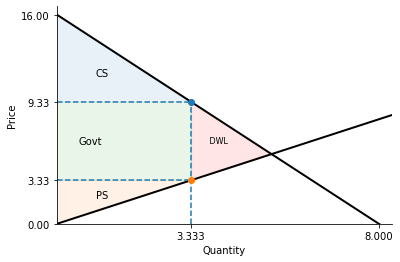

In [19]:
e.set_tax(6)

e.plot()
e.plot_surplus()
e.plot_dwl()

In [20]:
e.dwl

6.0

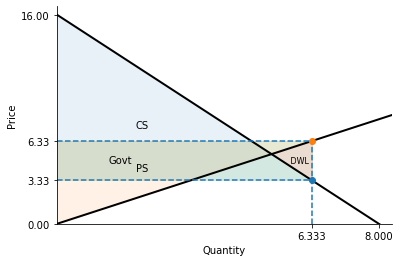

In [21]:
e.set_subsidy(3)

e.plot()
e.plot_surplus()
e.plot_dwl()
# This is messy. See below for one surplus item at a time.

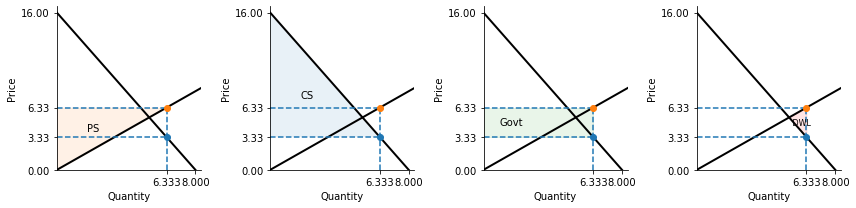

In [22]:
fig, ax = plt.subplots(1,4, figsize = (12,3))

for key, item in enumerate(['ps','cs','govt']):
  
    e.plot(ax[key])
    e.plot_surplus(items = [item], ax = ax[key])
    
e.plot(ax[3])
e.plot_dwl(ax[3])    
plt.tight_layout()

# Costs and Perfect Competition

In [23]:
total = econ.TotalCost(96, 2, 6)

Text(0.5, 1.0, 'Total Cost')

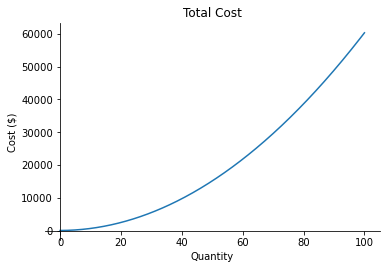

In [24]:
total.plot()
plt.title("Total Cost")

Text(0.5, 1.0, 'Firm Costs')

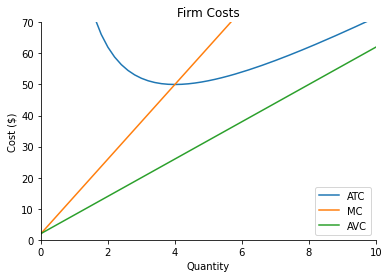

In [25]:
total.average_cost().plot(label = 'ATC')
total.marginal_cost().plot(label = 'MC')
total.variable_cost().average_cost().plot(label = 'AVC')

plt.legend()
plt.ylim(0,70)
plt.xlim(0,10)

plt.title("Firm Costs")

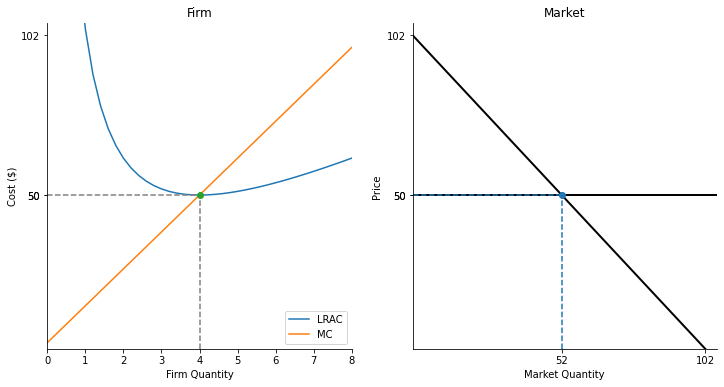

In [26]:
market_d = econ.Demand(102, -1)

lr_eq = econ.LongRunCompetitiveEquilibrium(market_d, total)

fig = plt.figure(figsize = (12,6))
lr_eq.plot(fig)

In [27]:
lr_eq.p, total.breakeven_price()

(50.0, 50.0)

In [28]:
lr_eq.market_q

52.0

In [29]:
lr_eq.firm_q

4.0

# Public Goods

This fails on corner solutions and for constant MC.

## Efficient Provision

In [30]:
d1 = econ.Demand(10,-1)
d2 = econ.Demand(12,-0.5)

msb = econ.SocialBenefit([d1,d2])

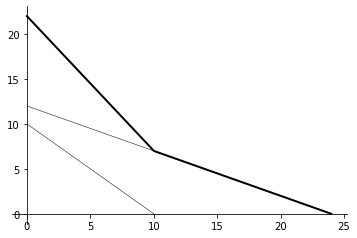

In [31]:
msb.plot()
d1.plot(linewidth = 0.5)
d2.plot(linewidth = 0.5)

In [32]:
# Create marginal costs of contribution for each player
c1 = econ.MarginalCost(1,2)
c2 = econ.MarginalCost(2,1)

# Create social cost by converting MC object to supply with .supply()
cost_array = [c1.supply(),c2.supply()]
agg_cost = econ.Aggregate(cost_array)

MSB* 7.923100000012658
Q* 9.384599999991561


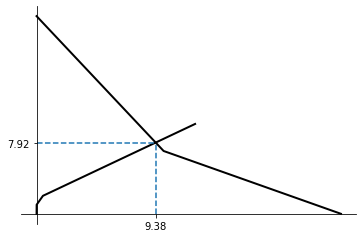

In [33]:
# Tolerance sets the sensitivity of the algorithm before stopping.
# Lower tolerance requires more compute time.
p,q = msb.efficient_outcome(agg_cost, tolerance = 0.0001)

print('MSB*', p)
print('Q*', q)


msb.plot()
agg_cost.plot()

plt.plot([0,q], [p,p], linestyle = 'dashed')
plt.plot([q,q], [0,p], linestyle = 'dashed', color = 'C0')

plt.xticks([q])
plt.yticks([p])

plt.show()

In [34]:
c1.q(p), c2.q(p)

(3.461550000006329, 5.923100000012658)

In [35]:
agg_cost.productive_efficiency(q) # q1, q2, MC

(matrix([[3.46153333, 5.92306667]]), 7.92306666666104)

## Private Contribution Game

In [36]:
print("private contributions", msb.private_outcome([c1,c2]) )

private contributions [[0.875 6.375]]


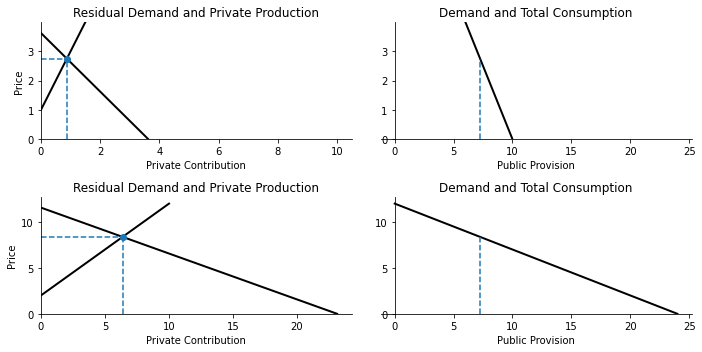

In [37]:
fig = plt.figure(figsize = (10,5))
msb.private_outcome_residual_demand_plots([c1,c2], fig = fig)

# 2 by 2 Games

##### Prisoner's Dilemma

In [38]:
pris_dilemma = econ.Game((2,2), (-1,3), (3,-1), (0,0))

pris_dilemma.nash()

{'A1B1'}

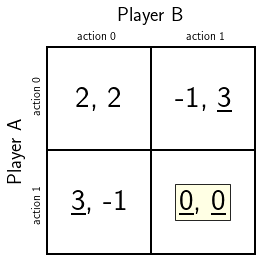

In [39]:
pris_dilemma.table()

##### No Nash

In [40]:
matching_pennies = econ.Game((1,-1), (-1,1), (-1,1), (1,-1))

matching_pennies.nash()

set()

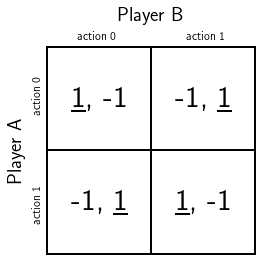

In [41]:
matching_pennies.table()